# Phase 2 - Supervised Machine Learning

For the second phase of our project, we will be using two supervised learning algorithms on the dataset we previously cleaned. We uploaded the cleaned version of the dataset in our repository, so we can import it and immediately start analysing the data in this part.  The algorithms we will be using in this phase will be the Linear Regression and Decision Trees algorithms. After we finish analysing our dataset using each algorithm, we will then compare the results we obtained from both and determine which one yielded better results. The criteria we will be evaluating our dataset on will be whether the food is healthy or not. Foods with total fat < 25, sugar < 12 and calories < 500 will be considered healthy.

### Part 1: Decision Tree Algorithm.

For the first algorithm, we decided to use the decision tree algorithm. We chose to use decision tree as its efficient and the implementation of it is relatively easy, and the results from the tree are easy to interpret. For this part, we will using alot of methods from the ‘sklearn’ library, which is a very helpful library for dealing with algorithms.

#### Splitting our dataset

We start this process by first determining a target variable. This value is needed in order for the decision tree to function properly and give us the result we want. For the target variable, we will use the 'Categories' column in the dataset. It lists whether a food is healthy(good) or unhealthy(bad). For the features, we decided to go with calories, total fat, and sugar, as those were the three values that were evaluated to determine whether a food was good or bad. 

After we have decided on all our variables, we will them use the predefined method train_test_split() from the 'sklearn' library in order to split our dataset into training and testing data. The test size value is how much of the dataset we wish to test on. We set it to 0.25 as we want to test on a quarter of our dataset. We added the random state variable in order to get the same train and test sets across different executions so our results stay consistent when we run the project on Github. If we would like to shuffle the dataset, all we would have to do is replace 42 with any other number greater than 0. Each number will give us a different shuffle of the data. We decided to go with the number 42 as it is the most common number used for random states in machine learning.


In [47]:
#Import the training and testing methods from the library.
from sklearn.model_selection import train_test_split

#We will import our dataset.
data=pd.read_csv("Dataset/FastfoodDatasetWithTV.csv")

#X will contain all the columns/features we will use to determine if a food is healthy or not.
features = ['calories', 'total_fat', 'sugar']
x = data[features]

#Y wil be the target value. We will use the 'healthy' column for the target value, which will either be 0 for 'not healthy' or 1 for 'healthy'.
y = data['Category']

#We called the train_test_split method, which will split our dataset into trainning and testing values. 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)

#### Classification

For the next step, We will create the Decision Tree Classifier using the predefined method DecisionTreeClassifier(). We will pass 2 parameters to the method, the criterion and the maximum depth of the tree. The criterion parameter is concerned with the information gain. We chose to go with the C4.5 algorithm (which uses entropy) as we thought it would be the best fit as it helps prevent overfitting. We also chose to add the max depth attribute and set it to 4 as we wanted our tree to stop after 4 levels. We then used the fit() method in order to train the model, and then used the .predict() method on the value we got from training the method in order to make predictions about it.

In [48]:
from sklearn.tree import DecisionTreeClassifier

#We created a new Decision Tree Classifier object which will build the decision tree.
classifier = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)

#We used the fit method to train the model.
classifier = classifier.fit(x_train, y_train)

#We used the predict method to make predictions about our data.
classifierPredictions = classifier.predict(x_test)

### Evaluation Methods

#### Confusion Matrix

After we have finishing training and testing our model, we will now evaluate the results. We will create the confusion matrix using the confusion_matrix() method already present in the 'sklearn' library. We will create a variable for the confusion matrix as we will need the information from it for the sensitivity and specificity scores in the following part. The results showed us that our model got 6 false positives and 1 false negative.


In [49]:
from sklearn.metrics import confusion_matrix

#We used this method to create our confusion matrix.
confusionMatrix = confusion_matrix(y_test, classifierPredictions)
print('Confusion Matrix:')
print(confusionMatrix)

Confusion Matrix:
[[34  6]
 [ 1 88]]


#### Accuracy, Precision, Sensitivity, and Specificity Scores

For the next part, we will calculate the accuracy, precision, sensitivity, and specificity scores of our model. For the first three, we will take advantage of the predefined methods in the 'sklearn.metrics' library to help us calculate the results easily. For the accuracy and the precision, we will also calculate the error rate. However, the specificity score does not have a predefined method in the library, therefore we will calculate the value ourselves using the confusion matrix variable we defined in the last step.
The predefined methods will take three parameters. The first is the y_test, which will be the true positive. The second is the classifierPredicitions, which will be the false positive. Because our target value is a string, we had to add the pos_label variable and set it to 'Good'.

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#We used this predefined method in order to measure the accuracy and error rate and then converted the results to a percentage.
accuracyScore = accuracy_score(y_test, classifierPredictions).round(7)
print('Accuracy:', accuracyScore *100, '%')
print('Error rate for accuracy:', (1 - accuracyScore) *100 , '%' )

#We used this predefined method in order to measure the precision and error rate and then converted the results to a percentage.
print('-------------------------------')
precisionScore = precision_score(y_test, classifierPredictions, pos_label='Good').round(7)
print('Precision:', precisionScore *100, '%')
print('Error rate for precision:', (1 - precisionScore) *100 , '%' )

#We used this predefined method in order to measure the sensitivty/recall score.
print('-------------------------------')
print('Sensitivity/Recall Score:', recall_score(y_test, classifierPredictions, pos_label='Good').round(7) *100,'%')

#Since there is no predefined mehtod to calculate the specificty score in the 'sklearn.metrics' library, we called the values from the confusion matrix and applied the equation ourselves.
print('-------------------------------')
print('Specificty Score:', (confusionMatrix[0,0]/ (confusionMatrix[0,0] + confusionMatrix[0,1])).round(7) *100, '%' )

Accuracy: 94.57364 %
Error rate for accuracy: 5.426359999999997 %
-------------------------------
Precision: 93.61702 %
Error rate for precision: 6.382980000000005 %
-------------------------------
Sensitivity/Recall Score: 98.8764 %
-------------------------------
Specificty Score: 85.0 %


#### Classification Report

We will then use the classification_report() method to generate a report for both the Good and Bad values. This report shows us the precision and recall score again for the good/healthy values, and it also shows the scores in terms of the bad/unhealthy values. This report also shows us the f1-score, which combines the precision and recall scores to measure the model's accuracy,  and the support. (Note: We generated this report just for more information about our tree; we will not use these values when visualizing  or comparing).

In [52]:
from sklearn.metrics import classification_report
#We will use this method to generate a classification report.
print(classification_report(y_test, classifierPredictions, target_names=['Bad', 'Good']))

              precision    recall  f1-score   support

         Bad       0.97      0.85      0.91        40
        Good       0.94      0.99      0.96        89

    accuracy                           0.95       129
   macro avg       0.95      0.92      0.93       129
weighted avg       0.95      0.95      0.94       129



#### K-Fold Cross Validation

We will then use the k-fold cross validation to see how well our model performs using different variations of our dataset after training it. Because it ensures that every observation from our dataset has the chance of appearing, this method helps us ensure that our model is less biased. We will use the cross_val_score() method, which will return an array containing the results from the cross validation method. 5 is set as the default value for the fold value in this method.


In [55]:
from sklearn.model_selection import cross_val_score
#We wrill print the values of the array that was returned from the cross val method.
print("5-Fold Cross Validation result: ", cross_val_score(classifier, x, y))

5-Fold Cross Validation result:  [0.94174757 0.96116505 0.89320388 0.9223301  0.9223301 ]


#### Feature Importance List

We will then print out a table ranking the importance of each feature. We will use the DataFrame() method to calculate the importance, then we will sort the values from the highest to the lowest using the sort_value() method. This will give us a clear table displaying the most important feature to the least. As we can see from the output, calories was ranked the most important, therefore it will be our best feature (as in it will be our root node).

In [29]:
#We will use this method in order to calulate the importance of the columns/features we used. We then used the sort_value() method to sort the results in ascending order.
feature_importance = pd.DataFrame(classifier.feature_importances_, index = x.columns).sort_values(0, ascending=False)
#We will print the results. 
feature_importance

,0
calories,0.855810
total_fat,0.114638
sugar,0.029552


### Visualization 

#### Decision Tree Visualization

Finally, the last step is to vizualize our tree and compare the reults. Firstly, we will visualize our decision tree using the plot_tree method from the 'matplotib' library. The visualization will be a plot tree that showcases the branching of our decision tree along with some information for each node. 

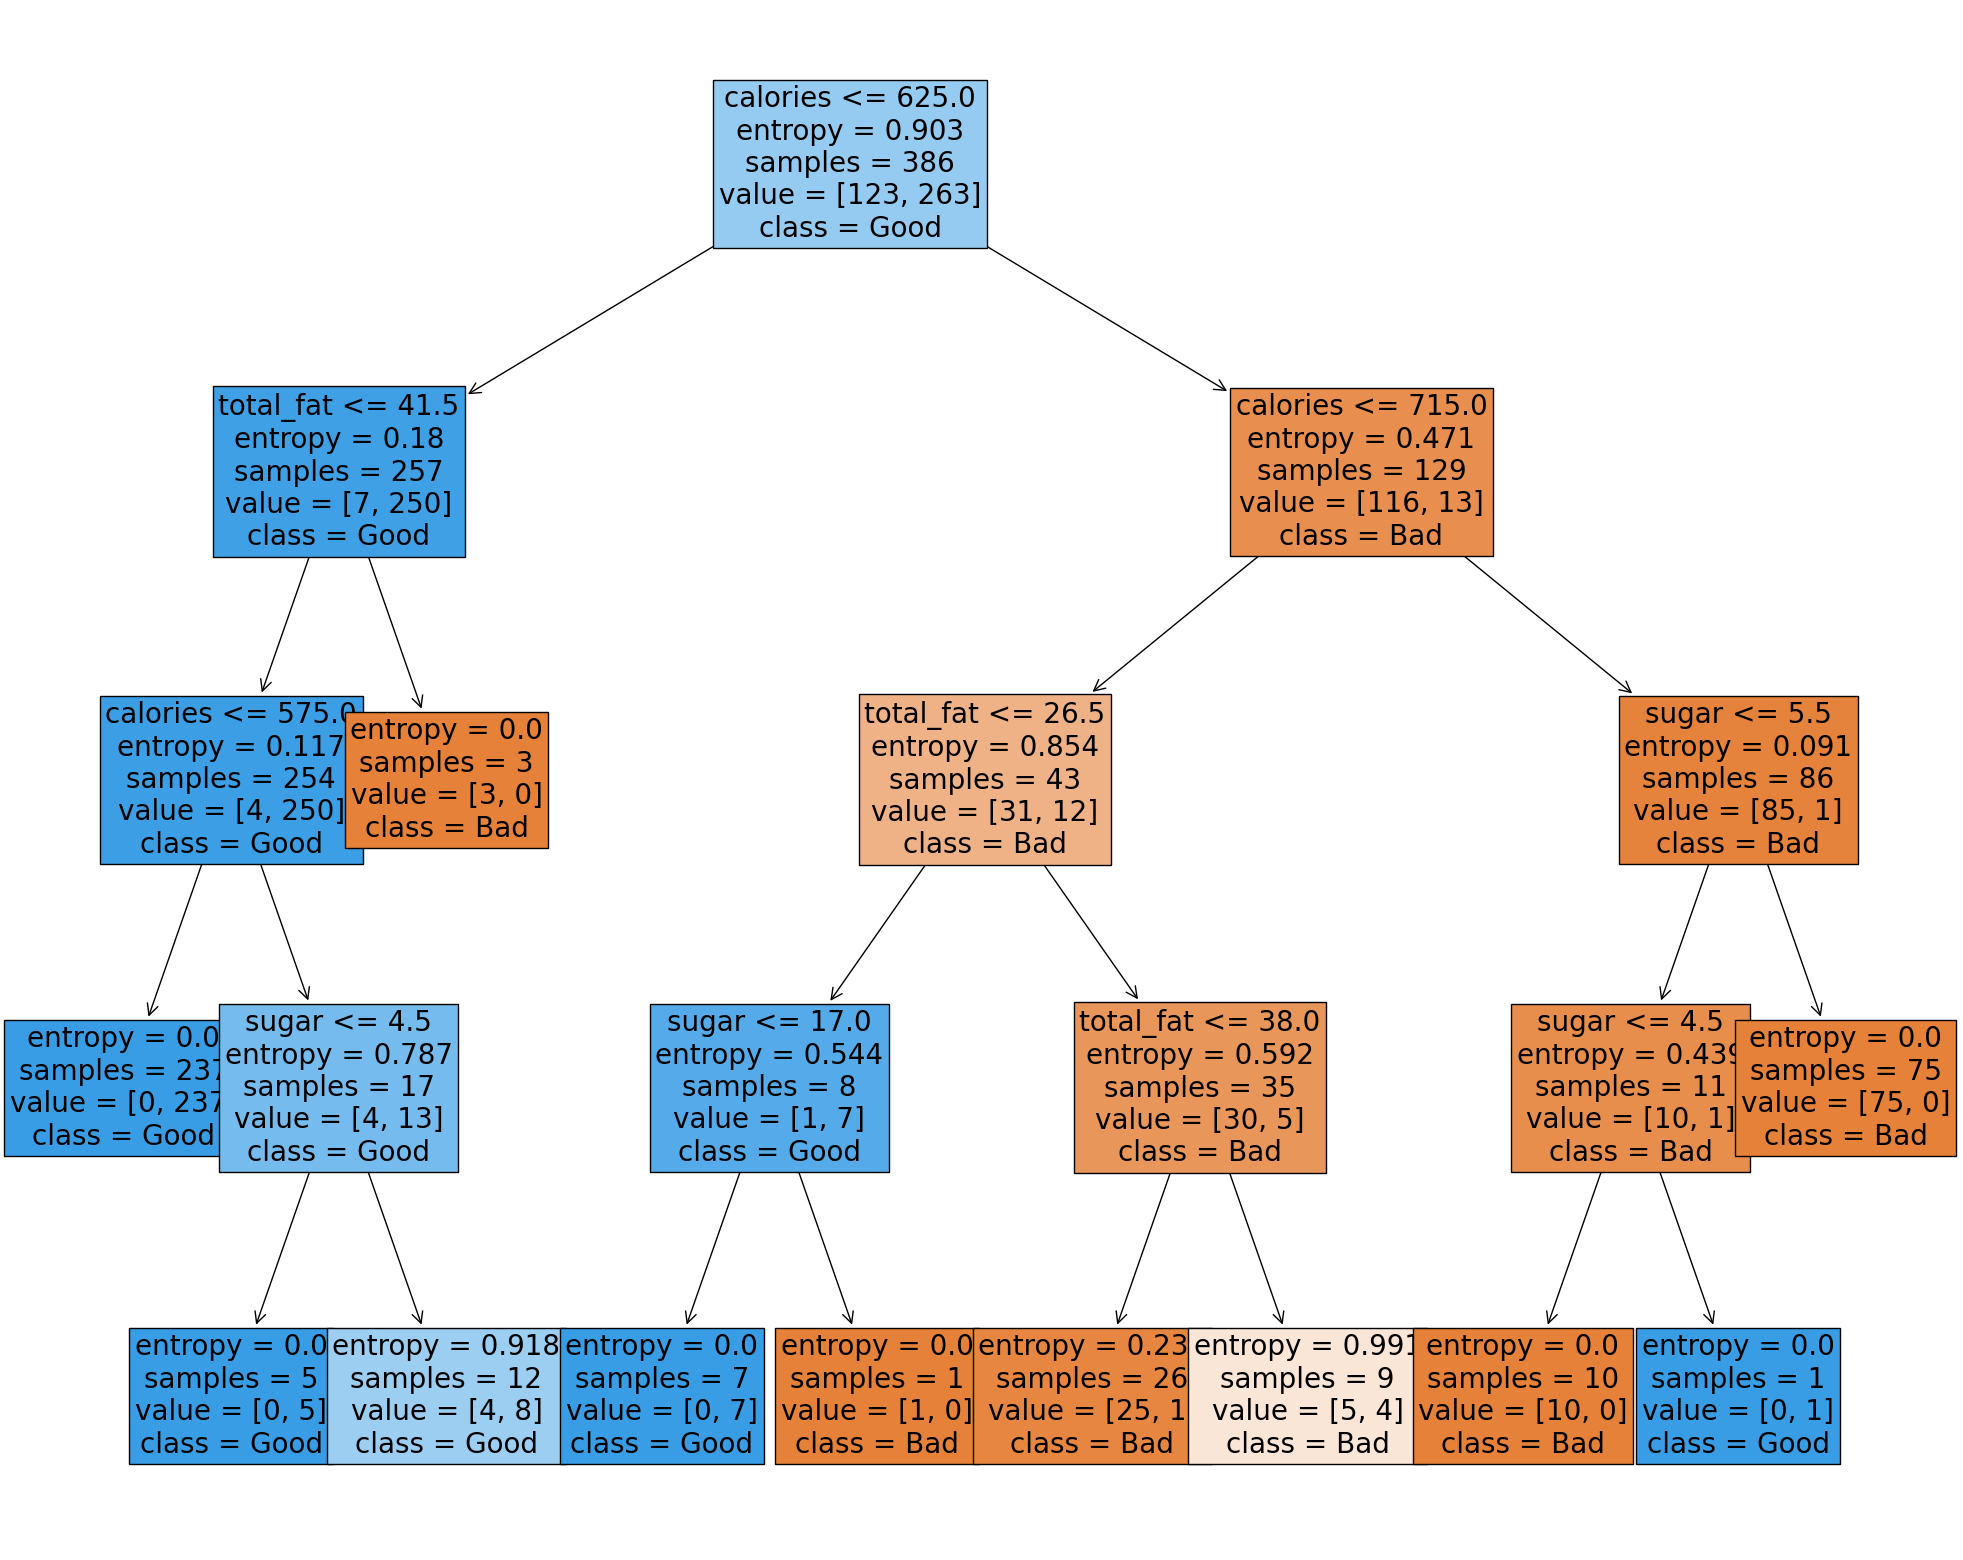

In [53]:
from sklearn import tree
from matplotlib import pyplot as plt

#We will use this method to visualize our tree.
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names=x.columns,  
                   class_names={0:'Bad', 1:'Good'},
                   filled=True,
                  fontsize=20)

#### Extra Visualization